In [26]:
import os
import sys
AbsPath = str(os.path.abspath(""))+"/../.."
sys.path.append(AbsPath)
import importlib
import pickle
import numpy as np
import matplotlib as mpl
import colossus.halo.mass_adv as massdefs
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
from matplotlib import cm
ColourMap = cm.RdBu
from Functions import Functions as F
from Scripts.Plots import SDSS_Plots
Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1) #pass this halomass:min, max, and binwidth for amting the SDSS plots
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
Cosmo =cosmology.getCurrent()
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1, Args are (Mass, Redshift)
h = Cosmo.h
h_3 = h*h*h

/data/pg1g15/STEEL/Notebooks/Plots/../../Scripts/Plots/SDSS_Plots.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df_cent.loc[self.Photomotry] = self.df_cent[self.Photomotry] + 0.025


FRACKSKY= 0.1404020420493216


In [2]:
importlib.reload(F)

<module 'Functions.Functions' from '/data/pg1g15/STEEL/Notebooks/Plots/../../Functions/Functions.py'>

In [3]:
# set plot paramaters here
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 2

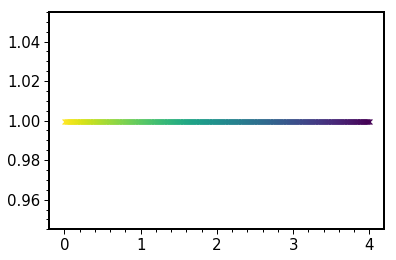

In [4]:
ColourMap = cm.viridis_r


def GetColour(z):
    if z > 4:
        z = 4
    return ColourMap(float((z/4)))

for i in np.arange(0, 4, 0.01):
    plt.plot(i, 1, "x", color=GetColour(i))
plt.show()

In [11]:
# Abundance Matching Parameters
Override = \
{\
'M10': 12.0, \
'SHMnorm10':0.032, \
'beta10':1.5, \
'gamma10':0.56, \
'M11':0.6, \
'SHMnorm11':-0.014, \
'beta11':-2, \
'gamma11':0.08\
}

AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':False,\
'G18_notSE':False,\
'G19_SE':False,\
'G19_cMod':False,\
'Lorenzo18':False,\
'Moster': False,\
'Moster10': False,\
'Illustris': False,\
'RP17': False,\
'z_Evo':True,\
'Scatter': 0.15,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT3': False,\
'g_PFT4': False,\
'HMevo': False,\
'HMevo_param': None\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'SFR_Model': 'CE',\
'PreProcessing': False,\
'AltDynamicalTimeB': False\
}

#Subhalomass function parameters macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

In [12]:
z_arr, SubHaloMass, NumberDensities = F.LoadData_MultiEpoch_SubHalos(('1.0', False, False, True, 'G19_DPL', 'G19_SE'))

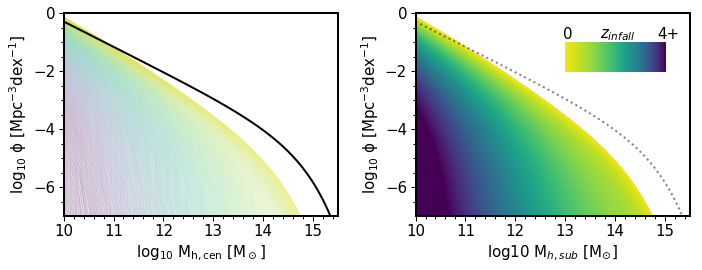

In [13]:
f, Plots = plt.subplots(1,2, figsize=(10,4))



Halo_MR = np.arange(10, 15.5, 0.1)
Plots[0].plot(Halo_MR,np.log10(HMF_fun(Halo_MR, 0)), "k")
Plots[0].set_xlabel("$\mathrm{log_{10}}$ $\mathrm{M_{h, cen}}$ $\mathrm{[M_\odot]}$")
Plots[0].set_ylabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")
Plots[0].set_xlim(10, 15.5)
Plots[0].set_ylim(-7, 0)


Lower = np.full_like(SubHaloMass, 10**(-300))
for NumberDen, z in zip(np.flipud(NumberDensities[2]), np.flip(z_arr)):
    Upper = Lower + NumberDen
    """
    print(np.log10(NumberDen))
    print(np.log10(Lower))
    print(np.log10(Upper))
    #"""
    Plots[1].fill_between(SubHaloMass, np.log10(Lower), np.log10(Upper), color = GetColour(z))
    Plots[0].fill_between(SubHaloMass, np.log10(Lower), np.log10(Upper), color = GetColour(z), alpha = 0.1)
    Lower = Upper
    
#LoopForPatch
for i, z in enumerate(z_arr[z_arr<4]):
    Start = (2*(i/len(z_arr[z_arr<4])))
    Stop = (2*((i+1)/len(z_arr[z_arr<4])))
    Patch = mpl.patches.Polygon([[13+Start,-1], [13+Start,-2], [13+Stop,-2], [13+Stop,-1]], closed = True, fill = True, visible = True, color = GetColour(z)) 
    Plots[1].add_patch(Patch)
Plots[1].text(12.95, -0.9, "0")
Plots[1].text(13.7, -0.85, r"$z_{infall}$")
Plots[1].text(14.85, -0.9, "4+")
Plots[1].set_ylim(-7, 0.0)
Plots[1].set_xlim(10, 15.5)
Plots[1].set_ylabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")
Plots[1].set_xlabel("log10 M$_{h, sub}$ [M$_{\odot}$]")
Plots[1].plot(Halo_MR,np.log10(HMF_fun(Halo_MR, 0)), ":k", alpha = 0.5)


plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Thesis/Intro/SubHaloes_byz.png")
plt.savefig(AbsPath+"/Figures/Thesis/Intro/SubHaloes_byz.pdf")
plt.show()

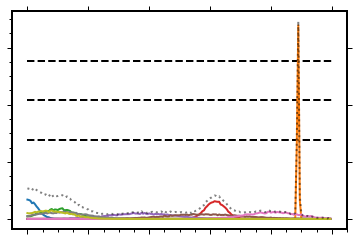

In [14]:
X = np.arange(0, 100, 0.5)
Total = np.zeros_like(X)
for i in range(1, 10):
    Hist, Bins = np.histogram(np.random.normal(loc = np.random.rand()*100, scale = np.random.rand()*15, size = 10000), bins = np.append(X, X[-1]+0.5))
    Total = Total + Hist
    plt.plot(X, Hist)
plt.plot(X, Total, ":k", alpha = 0.5)
Max = np.max(Total)
plt.hlines([0.8*Max, 0.6*Max, 0.4*Max], 0, 100, linestyles = "dashed")
plt.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.savefig("EPS_Cartoon.png")
plt.show()

In [15]:
from scipy import interpolate

/data/pg1g15/STEEL/Notebooks/Plots/../../Functions/Functions.py:809: RuntimeWarning: divide by zero encountered in log10
  return SMF_X, np.log10(np.divide(SMF_Y, SMF_Bin)) #M* [Msun], Phi [Mpc^-3]


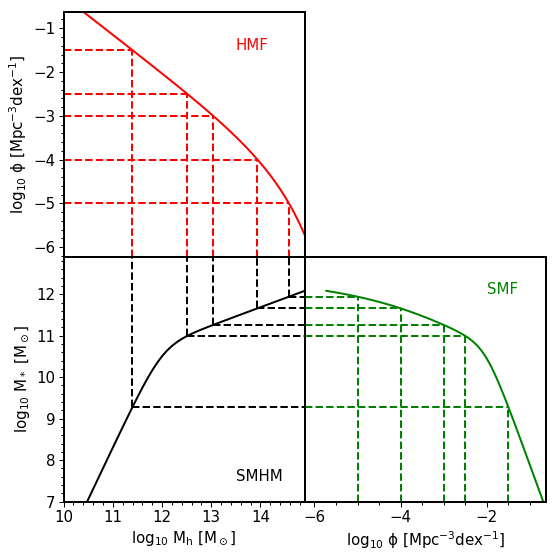

<Figure size 432x288 with 0 Axes>

In [16]:
def cnd_lines(num_den, num_den_min, ax1_in, ax2_in, ax3_in, hm_min_max, sm_min_max):
    #Function to calculate and plot CND lines
    #Inputs:
    #    num_den: number density at which to plot the lines
    #    ax*_in: tuples containing (figure, x, y)
    ax1_intp=interpolate.interp1d(ax1_in[2], ax1_in[1]) #y to x
    ax2_intp=interpolate.interp1d(ax2_in[1], ax2_in[2]) #x to y
    ax3_intp=interpolate.interp1d(ax3_in[2], ax3_in[1]) #x to y
    
    hm=ax1_intp(num_den)
    sm1=ax3_intp(num_den)
    sm2=ax2_intp(hm)
    #assert sm1 == sm2: print(sm1, sm2)
    
    ax1_in[0].hlines(num_den, hm_min_max[0], hm, linestyle = "--", color = "r")
    ax2_in[0].hlines(sm1, hm, hm_min_max[1], linestyle = "--", color = "k")
    ax3_in[0].hlines(sm1, num_den_min, num_den, linestyle = "--", color = "g")
    ax1_in[0].vlines(hm, num_den_min, num_den, linestyle = "--", color = "r")
    ax2_in[0].vlines(hm, sm1, sm_min_max[1], linestyle = "--", color = "k")
    ax3_in[0].vlines(num_den, sm_min_max[0], sm1, linestyle = "--", color = "g")
    
    
hm_min_max=[10, 15]
sm_min_max=[7, 13]
bin_widths=0.1
halo_masses=np.arange(hm_min_max[0], hm_min_max[1], bin_widths)
stellar_masses=np.arange(sm_min_max[0], sm_min_max[1], bin_widths)
hmf=np.log10(HMF_fun(halo_masses, 0.1))
AbnMtch['Override_z'] = True
AbnMtch['Scatter'] = 0.01
smhm = F.DarkMatterToStellarMass(halo_masses, 0.1, Paramaters, ScatterOn = False)
smf = F.DM_to_SM(stellar_masses+0.05, np.log10(HMF_fun(halo_masses, 0.1)), halo_masses, bin_widths,bin_widths, Paramaters, Redshift = 0.1, N = 10000)[1]
AbnMtch['Override_z'] = False
AbnMtch['Scatter'] = 0.01


fig = plt.figure(figsize=[8,8])
gs = GridSpec(12, 12, hspace=0.0,wspace=0.0,figure=fig)
ax1 = fig.add_subplot(gs[0:6,0:6])
ax2 = fig.add_subplot(gs[6:12,0:6])
ax3 = fig.add_subplot(gs[6:12,6:12])


ax1.set_xlim(halo_masses[0], halo_masses[-1])
ax1.set_ylim((np.max([np.min(hmf), np.min(smf)]))-0.5, np.min([np.max(smf), np.max(hmf)])+0.5)
ax2.set_xlim(halo_masses[0], halo_masses[-1])
ax2.set_ylim(stellar_masses[0], stellar_masses[-1])
ax3.set_xlim((np.max([np.min(hmf), np.min(smf)]))-0.5, np.min([np.max(smf), np.max(hmf)])+0.5)
ax3.set_ylim(stellar_masses[0], stellar_masses[-1])


num_den_min=(np.max([np.min(hmf), np.min(smf)]))-0.5


ax1_pkg = (ax1, halo_masses, hmf)
ax2_pkg = (ax2, halo_masses, smhm)
ax3_pkg = (ax3, smhm, hmf)

cnd_lines([-1.5, -2.5, -3.0, -4.0, -5.0], num_den_min, ax1_pkg, ax2_pkg, ax3_pkg, hm_min_max, sm_min_max)

ax1.plot(halo_masses, hmf, "-r")
ax2.plot(halo_masses, smhm, "-k")
ax3.plot(hmf, smhm, "-g")


ax1.set_ylabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")
ax2.set_xlabel("$\mathrm{log_{10}}$ $\mathrm{M_h}$ $\mathrm{[M_\odot]}$")
ax2.set_ylabel("$\mathrm{log_{10}}$ $\mathrm{M_*}$ $\mathrm{[M_\odot]}$")
ax3.set_xlabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")

ax1.set_xticks([])
ax3.set_yticks([])

ax1.text(13.5, -1.5, "HMF", color = "r")
ax2.text(13.5, 7.5, "SMHM", color = "k")
ax3.text(-2, 12, "SMF", color = "g")

plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Thesis/Method/AbundaceMatching.png")
plt.show()
plt.clf()

[10.71543457 11.3813331  11.6491539 ] [-3, -4, -5] [0.45775857 0.26357773 0.33789722] [0. 0. 0.]


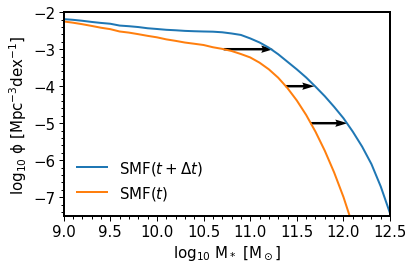

<Figure size 432x288 with 0 Axes>

In [17]:
hm_min_max=[10, 15]
sm_min_max=[9, 13]
bin_widths=0.1
halo_masses=np.arange(hm_min_max[0], hm_min_max[1], bin_widths)
stellar_masses=np.arange(sm_min_max[0], sm_min_max[1], bin_widths)
hmf=np.log10(HMF_fun(halo_masses, 0.1))

#Create SMF at low and high redshift
AbnMtch['G19_SE'] = True
smhm=F.DarkMatterToStellarMass(halo_masses, 0.1, Paramaters, ScatterOn = False)
smf_dt=F.DM_to_SM(stellar_masses+0.05, np.log10(HMF_fun(halo_masses, 0.1)), halo_masses, bin_widths,bin_widths, Paramaters, Redshift = 0.1, N = 10000)[1]
smf_t=F.DM_to_SM(stellar_masses+0.05, np.log10(HMF_fun(halo_masses, 2)), halo_masses, bin_widths,bin_widths, Paramaters, Redshift = 1, N = 10000)[1]
AbnMtch['G19_SE'] = False

#create interpolations that accept number density and return mass
smf_t_interp=interpolate.interp1d(smf_t,  stellar_masses)
smf_dt_interp=interpolate.interp1d(smf_dt,  stellar_masses)

#create arrays for plotting arrows
num_d=[-3,-4,-5]
sm_t=smf_t_interp(num_d)
sm_dt=smf_dt_interp(num_d)
d_sm = sm_dt - sm_t - 0.05

print(sm_t, num_d, d_sm, np.zeros(np.size(num_d)))
plt.quiver(sm_t, num_d, d_sm, np.zeros(np.size(num_d)), scale = np.size(num_d))


plt.plot(stellar_masses, smf_dt, label = r"SMF($t+\Delta t$)")
plt.plot(stellar_masses, smf_t, label = "SMF($t$)")
plt.xlim(9, 12.5)
plt.ylim(-7.5, -2)
plt.xlabel("$\mathrm{log_{10}}$ $\mathrm{M_*}$ $\mathrm{[M_\odot]}$")
plt.ylabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")
plt.legend(frameon = False)
plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Thesis/Method/ContinuityEqn.png")
plt.show()
plt.clf()

In [29]:
from Scripts.CentralPostprocessing import PairFractionData, Fit_to_Str

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [30]:
Total_Factors = [('1.0', True, True, True, 'CE', 'G19_SE')]
ClassList = []
SucessfulData = os.listdir(AbsPath+"/Scripts/CentralPostprocessing/")
for Fit in Total_Factors:
    FitName = Fit_to_Str(Fit)
    if FitName+".pkl" in SucessfulData:
        ClassList.append([Fit, pickle.load(open(AbsPath+"/Scripts/CentralPostprocessing/"+FitName+".pkl", 'rb'))])

In [279]:
post_processed = ClassList[0][1]
hm_hist = np.power(10, post_processed.AvaHaloMass)
z = post_processed.z
sm_hist = np.power(10,post_processed.AvaStellarMass)

s0 = 0.195 + 1.157*(z) - 0.143*(z**2)
logM0 = 9.244 + 0.753*(z) - 0.09*(z**2)
Gamma = -1.118 #including -ve here to avoid it later
log10MperY = (s0 - np.log10(1 + np.power(np.power(10, (np.log10(sm_hist.T) - logM0) ), Gamma))).T
sfr = np.power(10, log10MperY)
ssfr = log10MperY - sm_hist

In [280]:
hm15_slice = np.digitize(10**15, bins = hm_hist[0])-1
#levels = MaxNLocator(nbins=50).tick_values(sfr[:,:hm15_slice].min(), sfr[:,:hm15_slice].max())
levels = [0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128, 256]
cmap = plt.get_cmap('viridis')#cm.viridis_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

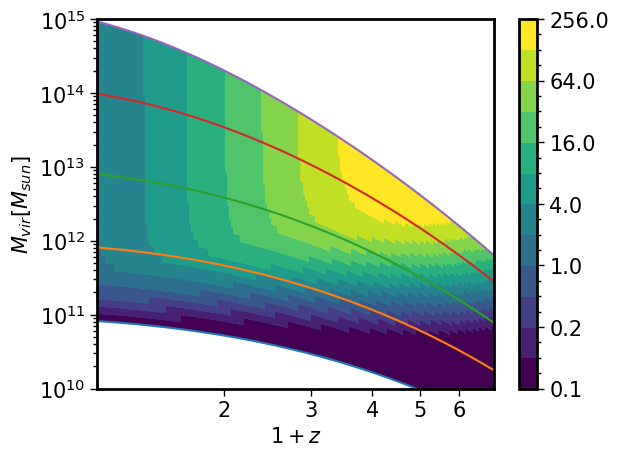

<Figure size 640x480 with 0 Axes>

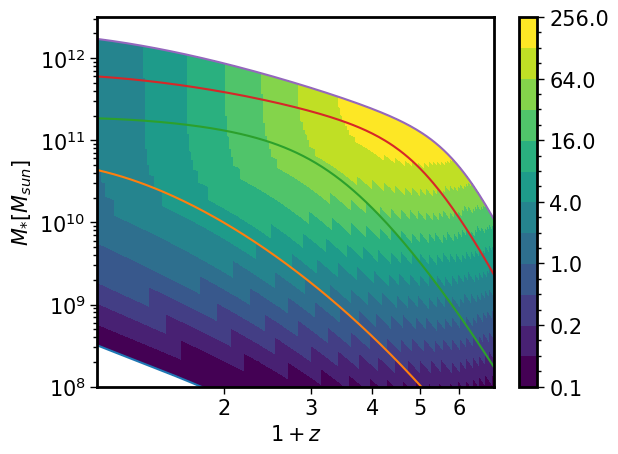

<Figure size 640x480 with 0 Axes>

In [265]:
#plt.imshow(np.log10(sfr), cmap=plt.cm.viridis, origin = 'lower', extent=[np.min(1+z), np.max(1+z),np.min(hm_hist), np.max(hm_hist)], aspect = ((np.log10(np.min(1+z)) - np.log10(np.max(1+z)))/(np.log10(np.min(hm_hist)) - np.log10(np.max(hm_hist)))))
fig = plt.figure()
ax = fig.add_subplot(111)

im = plt.pcolormesh(np.log10(1 + z).repeat(hm15_slice).reshape(190,hm15_slice), hm_hist[:,1:hm15_slice+1], (sfr[:-1,:hm15_slice-1]), cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)

for hm in [11,12,13,14,15]:
    hm_slice = np.digitize(10**hm, bins = hm_hist[0])-1
    plt.plot(np.log10(1+z), hm_hist[:,hm_slice])

ax.set_xticks(np.log10([2,3,4,5,6]))
labels = [ i+2 for i, j in enumerate(ax.get_xticklabels())]
ax.set_xticklabels(labels)
ax.minorticks_off()

ax.set_yscale('log')
ax.set_ylim(10**10, 10**15)
ax.set_xlabel(r"$1+z$")
ax.set_ylabel(r"$M_{vir}[M_{sun}]$")
plt.savefig(AbsPath+"/Figures/Thesis/Halogrowth_SFR.png")
plt.show()
plt.clf()

fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.pcolormesh(np.log10(1 + z).repeat(hm15_slice).reshape(190,hm15_slice), sm_hist[:,1:hm15_slice+1], sfr[:-1,:hm15_slice-1], cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)

for hm in [11,12,13,14,15]:
    hm_slice = np.digitize(10**hm, bins = hm_hist[0])-1
    ax.plot(np.log10(1+z), sm_hist[:,hm_slice])

ax.set_xticks(np.log10([2,3,4,5,6]))
labels = [ i+2 for i, j in enumerate(ax.get_xticklabels())]
ax.set_xticklabels(labels)
ax.minorticks_off()

ax.set_yscale('log')
ax.set_ylim(10**8, 10**12.5)
ax.set_xlabel(r"$1+z$")
ax.set_ylabel(r"$M_{*}[M_{sun}]$")
plt.savefig(AbsPath+"/Figures/Thesis/Stellargrowth_SFR.png")
plt.show()
plt.clf()

In [416]:
from itertools import cycle

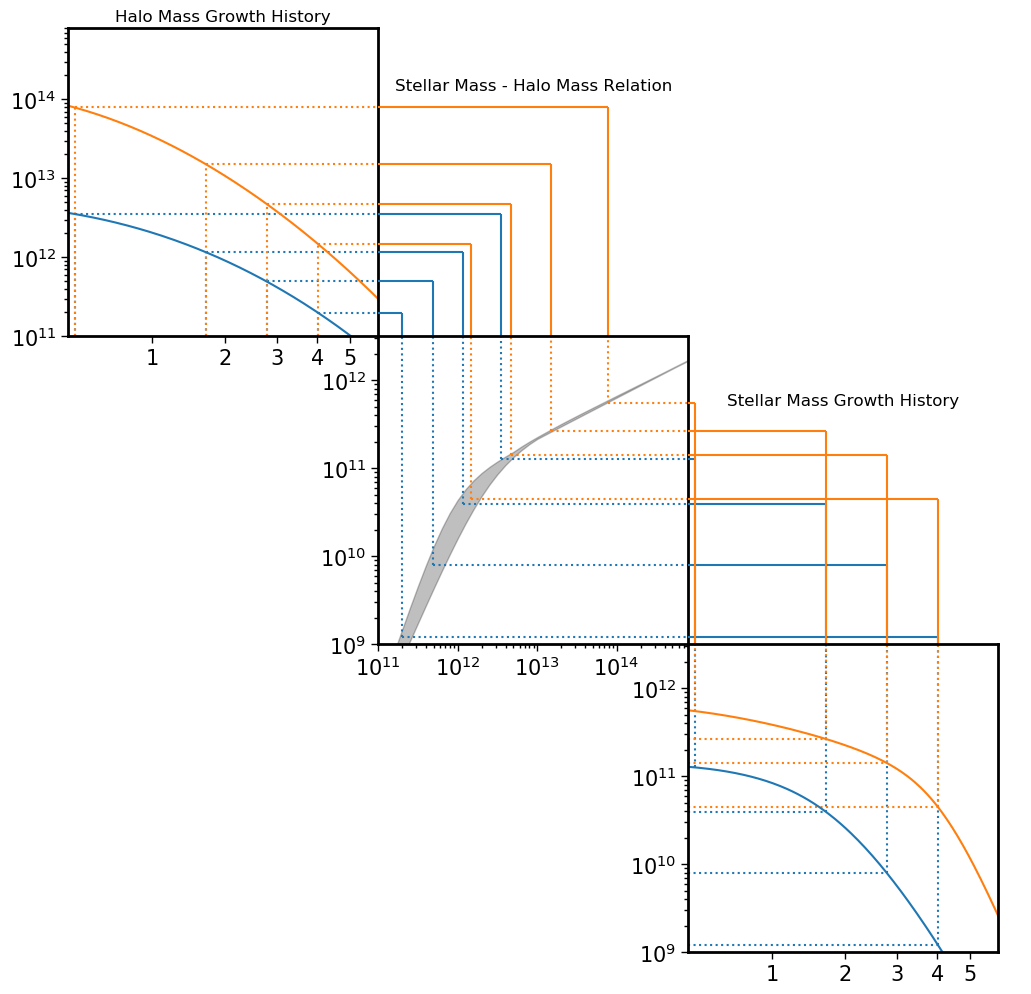

In [464]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)

fig = plt.figure(figsize=[12,12])
gs = GridSpec(18, 18, hspace=0.0,wspace=0.0,figure=fig)
ax1 = fig.add_subplot(gs[0:6,0:6])
hidden1 = fig.add_subplot(gs[0:6,6:12])
ax2 = fig.add_subplot(gs[6:12,6:12])
hidden2 = fig.add_subplot(gs[6:12,12:18])
ax3 = fig.add_subplot(gs[12:18,12:18])

hm_0 = [12.7, 14]

z_slices = np.array([0.3,1.7,2.75,4])
z_index = np.digitize(z_slices, bins = z)
hm_slice = np.digitize(np.power(10,hm_0), bins = hm_hist[0])-1

"""hidden1.get_xaxis().set_visible(False)
hidden2.get_xaxis().set_visible(False)
hidden1.get_yaxis().set_visible(False)
hidden2.get_yaxis().set_visible(False)"""

hidden1.axis('off')
hidden2.axis('off')

ax1.set_xlim(0.1,np.log10(1+6))
ax1.set_ylim(10**11,10**14.9)
hidden1.set_xlim(0,1)
hidden1.set_ylim(0,1)
ax2.set_xlim(10**11,10**14.9)
ax2.set_ylim(10**9,10**12.5)
hidden2.set_xlim(0,1)
hidden2.set_ylim(0,1)
ax3.set_xlim(0.1,np.log10(1+6))
ax3.set_ylim(10**9,10**12.5)

for hm in hm_0:
    _hm_slice = np.digitize(10**hm, bins = hm_hist[0])-1
    ax1.plot(np.log10(1+z), hm_hist[:,_hm_slice])

for hm in hm_0:
    _hm_slice = np.digitize(10**hm, bins = hm_hist[0])-1
    ax3.plot(np.log10(1+z), sm_hist[:,_hm_slice])

    
for ax in [ax1,ax3]:
    ax.set_xticks(np.log10([2,3,4,5,6]))
    labels = [i+1 for i, j in enumerate(ax.get_xticklabels())]
    ax.set_xticklabels(labels)
    ax.minorticks_off()    
    ax.set_yscale('log')

    
hm_min_max=[10, 15]
sm_min_max=[7, 13]
bin_widths=0.1
halo_masses=np.arange(hm_min_max[0], hm_min_max[1], bin_widths)
stellar_masses = []
for _z in [0.1,1,2,5]:
    AbnMtch['G19_SE'] = True
    stellar_masses.append(F.DarkMatterToStellarMass(halo_masses, _z, Paramaters, ScatterOn = False))
    AbnMtch['G19_SE'] = False
    #ax2.plot(10**halo_masses, 10**stellar_masses[-1])

stellar_masses = np.array(stellar_masses)+bin_widths
ax2.fill_between(10**halo_masses, np.min(10**stellar_masses, axis=0), np.max(10**stellar_masses, axis=0), alpha = 0.25, color = 'k')

ax2.loglog()

def line_plot(ax, disp_cord, colour='k', fmt = ":", hor=True, vert=True, x_lim='min', y_lim='min'):
    inverter = ax.transData.inverted()
    #print(inverter.transform(disp_cord))
    ax_x, ax_y = inverter.transform(disp_cord).T
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    
    if hor:
        if x_lim=='min':
            ax.hlines(ax_y, x_min, ax_x, color=colour, linestyle=fmt)
        if x_lim=='max':
            ax.hlines(ax_y, ax_x, x_max, color=colour, linestyle=fmt)
    
    if vert:
        if y_lim=='min':
            ax.vlines(ax_x, y_min, ax_y, color=colour, linestyle=fmt)
        if y_lim=='max':    
            ax.vlines(ax_x, ax_y, y_max, color=colour, linestyle=fmt)

def walk_though(figure, z_ix , h_ix):
    axes = figure.get_axes()
    
    hm = hm_hist[z_ix][:,h_ix].T
    sm = sm_hist[z_ix][:,h_ix].T
    _z = np.log10(z[z_ix]+1)
    
    for ix, m in enumerate(hm):
        hm_z_stack = np.vstack((_z, hm[ix])).T
        sm_z_stack = np.vstack((_z, sm[ix])).T
        hm_sm_stack = np.vstack((hm[ix], sm[ix])).T
        # get display coords for each corner
        ax1_corner = axes[0].transData.transform(hm_z_stack)
        ax2_corner = axes[2].transData.transform(hm_sm_stack)
        ax3_corner = axes[4].transData.transform(sm_z_stack)

        ah1_corner = np.vstack((ax2_corner[:,0], ax1_corner[:,1])).T
        ah2_corner = np.vstack((ax3_corner[:,0], ax2_corner[:,1])).T
        
        c = next(colourcycler)
        
        line_plot(axes[0], ax1_corner, colour = c, x_lim='max', y_lim='min')
        line_plot(axes[1], ah1_corner, colour = c, x_lim='min', y_lim='min', fmt="-")
        line_plot(axes[2], ax2_corner, colour = c, x_lim='max', y_lim='max')
        line_plot(axes[3], ah2_corner, colour = c, x_lim='min', y_lim='min', fmt="-")
        line_plot(axes[4], ax3_corner, colour = c, x_lim='min', y_lim='max')
    

walk_though(fig, z_index, hm_slice)

ax1.set_title("Halo Mass Growth History", fontsize = 12, pad = 5)
hidden1.set_title("Stellar Mass - Halo Mass Relation", fontsize = 12, pad = -45)
hidden2.set_title("Stellar Mass Growth History", fontsize = 12, pad = -50)
plt.show()

In [452]:
plt.title?

Signature: plt.title(label, fontdict=None, loc='center', pad=None, **kwargs)
Docstring:
Set a title for the axes.

Set one of the three available axes titles. The available titles
are positioned above the axes in the center, flush with the left
edge, and flush with the right edge.

Parameters
----------
label : str
    Text to use for the title

fontdict : dict
    A dictionary controlling the appearance of the title text,
    the default `fontdict` is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight' : rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

loc : {'center', 'left', 'right'}, str, optional
    Which title to set, defaults to 'center'

pad : float
    The offset of the title from the top of the axes, in points.
    Default is ``None`` to use rcParams['axes.titlepad'].

Returns
-------
text : :class:`~matplotlib.text.Text`
    The matplotlib text instance representing the title

Other Parameters
--